In [3]:
#datos
import numpy as np
import pandas as pd
#visualización
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm
import os

In [4]:
df_prhouse = pd.read_csv('ParisHousing.csv')
df_prhouse

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1726,89,0,1,5,73133,7,6,2009,0,1,9311,1698,218,0,4,176425.9
9996,44403,29,1,1,12,34606,9,4,1990,0,1,9061,1742,230,0,0,4448474.0
9997,83841,3,0,0,69,80933,10,10,2005,1,1,8304,7730,345,1,9,8390030.5
9998,59036,70,0,0,96,55856,1,3,2010,0,1,2590,6174,339,1,4,5905107.0


In [21]:
#Variables
metros2 = df_prhouse['squareMeters']
precio = df_prhouse['price']
año = df_prhouse['made']
exclusividad = df_prhouse['cityPartRange']
protector = df_prhouse['hasStormProtector']
pileta = df_prhouse["hasPool"]
habitaciones = df_prhouse['numberOfRooms']
patio = df_prhouse['hasYard']
pisos= df_prhouse['floors']
duerños_anteriores= df_prhouse['numPrevOwners']

#Significado de cada columna
squareMeters
numberOfRooms
hasYard
hasPool
floors - number of floors
cityCode - zip code
cityPartRange - the higher the range, the more exclusive the neighbourhood is
numPrevOwners - number of prevoious owners
made - year
isNewBuilt
hasStormProtector
basement - basement square meters
attic - attic square meteres
garage - garage size
hasStorageRoom
hasGuestRoom - number of guest rooms
price

In [6]:
df_prhouse.shape

(10000, 17)

In [7]:
df_prhouse.describe().T

,count,mean,std,min,25%,50%,75%,max
squareMeters,10000.0,4.987013e+04,2.877438e+04,89.0,25098.50,50105.5,74609.75,99999.0
numberOfRooms,10000.0,5.035840e+01,2.881670e+01,1.0,25.00,50.0,75.00,100.0
hasYard,10000.0,5.087000e-01,4.999493e-01,0.0,0.00,1.0,1.00,1.0
hasPool,10000.0,4.968000e-01,5.000148e-01,0.0,0.00,0.0,1.00,1.0
floors,10000.0,5.027630e+01,2.888917e+01,1.0,25.00,50.0,76.00,100.0
cityCode,10000.0,5.022549e+04,2.900668e+04,3.0,24693.75,50693.0,75683.25,99953.0
cityPartRange,10000.0,5.510100e+00,2.872024e+00,1.0,3.00,5.0,8.00,10.0
numPrevOwners,10000.0,5.521700e+00,2.856667e+00,1.0,3.00,5.0,8.00,10.0
made,10000.0,2.005488e+03,9.308090e+00,1990.0,1997.00,2005.5,2014.00,2021.0
isNewBuilt,10000.0,4.991000e-01,5.000242e-01,0.0,0.00,0.0,1.00,1.0


In [8]:
df_prhouse.head(11)

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0
5,39223,36,0,1,17,39489,8,6,2012,0,1,2009,4552,757,0,1,3926647.2
6,58682,10,1,1,99,6450,10,9,1995,1,1,5930,9453,848,0,5,5876376.5
7,86929,100,1,0,11,98155,3,4,2003,1,0,6326,4748,654,0,10,8696869.3
8,51522,3,0,0,61,9047,8,3,2012,1,1,632,5792,807,1,5,5154055.2
9,39686,42,0,0,15,71019,5,8,2021,1,1,5198,5342,591,1,3,3970892.1


In [9]:
df_prhouse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

#Abstract

En este dataset podemos encontrar diversos datos correspondientes a una variedad de propiedades ubicadas en París, Francia.
Dentro de estos datos la gran mayoria detallan características propias de la vivienda, tales como los metros cuadrados, cantidad de habitaciones, año de construcción, entre otras.
También podemos encontrar información acerca de datos ajenos a la estructura de la propiedad, siendo estos por ejemplo cantidad de dueños anteriores, la exclusividad del barrio y, uno de los datos que más nos va a importar para los fines
de este dataset, el precio de lab propiedad.
El precio de la propiedad, toma gran valor en este dataset al ser interpretado como el resultado obtenido por la suma de las distintas variables presentes, así que el mismo será mi guía para poder relacionarlo con el resto de datos.
De esta afirmación se deriva la intención de mi proyecto, realizar un código capaz de predecir el precio de las propiedades bajo los mismos parametros que se presentan en el dataset. Un modelo de regresión, en donde el precio será mi variable dependiente y se podrá determinar su valor a través del resto de variables.

Bajo esta premisa y tras un leve contacto con el dataset determino que hay ciertas variables que pueden influenciar en mayor o menor medida al resutlado obtenido, los metros cuadrados, la exclusividad del barrio, el año de construcción, si posee pileta o patio. También puedo descartar aquellos datos que, en una primera observación, no afectarán a su valor, como por ejemplo la cantiad de dueños previos, el código de la ciudad y la cantidad de habitaciones de huespedes.

# Análisis relación precio - variables

In [20]:
#Correlación de variables en relación al precio
correlation_matrix=df_prhouse.corr()

feature_coorelation=correlation_matrix["price"].sort_values(ascending=False)
print (feature_coorelation)

price                1.000000
squareMeters         0.999999
numPrevOwners        0.016619
numberOfRooms        0.009591
cityPartRange        0.008813
hasStormProtector    0.007496
floors               0.001654
attic               -0.000600
hasGuestRoom        -0.000644
cityCode            -0.001539
hasStorageRoom      -0.003485
basement            -0.003967
hasPool             -0.005070
hasYard             -0.006119
made                -0.007210
isNewBuilt          -0.010643
garage              -0.017229
Name: price, dtype: float64


En una primera instancia, pretendo demostrar y verificar mis hipotesis respecto a los valores que afectan en mayor medidad al valor de la propiedad.
Como primer variable a analizar para estimar el precio de la propiedad me enfocaré en los metros cuadrados, los cuales en la mayoría de casos,influencia en gran parte al valor de la superficie.

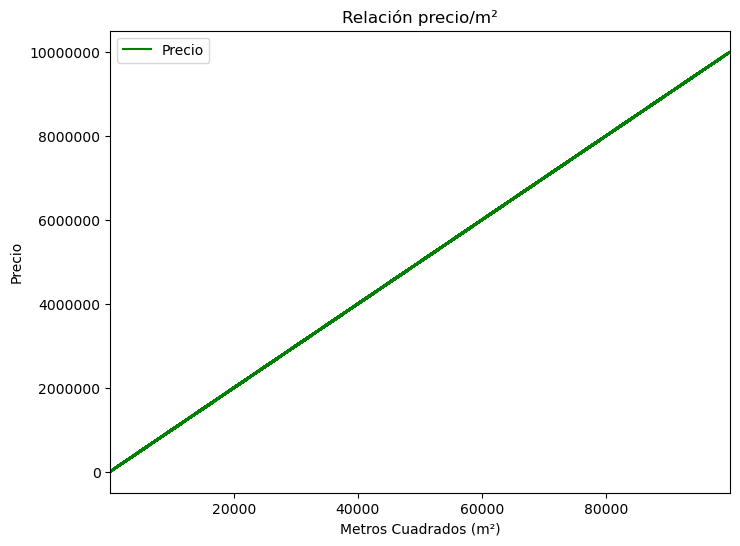

In [10]:
#Gráfico de lineas
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(metros2, precio, color='green', label='Precio')

ax.set_xlabel('Metros Cuadrados (m²)')
ax.set_ylabel('Precio')

ax.ticklabel_format(style='plain', axis='y')
ax.set_xlim(metros2.min(), metros2.max())
ax.set_title('Relación precio/m²')

ax.legend()


plt.savefig('mi_grafico.png')


Por medio del gráfico podemos observar que mi hipotesis puede no ser erronea, pero para indagar aún más en esta realción procedo a realizar un modelo que respalde el gráfico.

In [11]:
modell = 'precio~metros2'

resultado = sm.ols(formula =modell,data= df_prhouse).fit()
print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:                 precio   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.775e+09
Date:                Sun, 19 Nov 2023   Prob (F-statistic):               0.00
Time:                        17:01:26   Log-Likelihood:                -95093.
No. Observations:               10000   AIC:                         1.902e+05
Df Residuals:                    9998   BIC:                         1.902e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6460.8797     65.294     98.950      0.0

Con un 100% en resultado del R² puedo determinar que el precio es directamente proporcional a la variable de Metros², siendo este uno de los datos con mayor peso a la hora de determinarlo. 

Con respecto a la exclusividad del barrio, al componerse de una lista de valores que van del 1 al 10 puede verse rapidamente su relación con el precio, pero esta vez usando como vara de medición la mediana de los precios.

In [12]:
Lista_exclusividad=exclusividad.unique().tolist()
Lista_exclusividad.sort(reverse=False)
Lista_exclusividad

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

Text(0.5, 1.0, 'Relación precio/exclusividad')

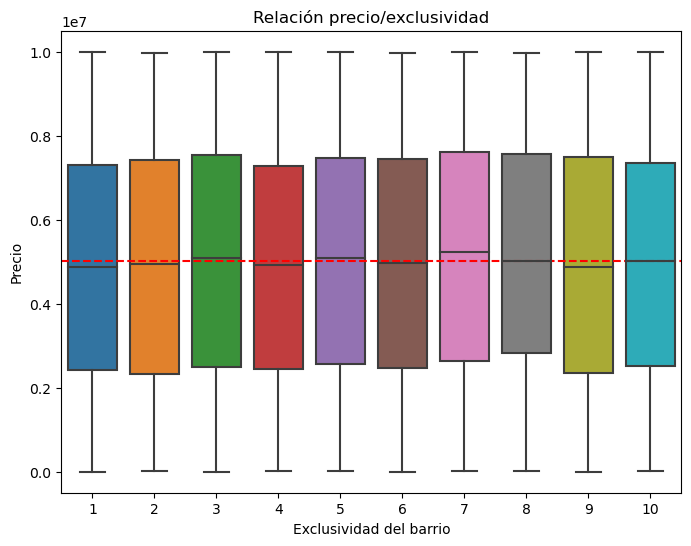

In [13]:
#Relación entre exclusividad del barrio y el valor de la propiedad
mediana = precio.median()

fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=exclusividad, y=precio)
ax.axhline(mediana, color='r', linestyle='--', label='Mediana')

ax.set_xlabel('Exclusividad del barrio')
ax.set_ylabel('Precio')

ax.set_title('Relación precio/exclusividad')

Como primera observación no hay una clara variación entre los precios según la exclusividad del barrio, pero si parece ser una variable que puede ayudar a determinar el valor de la propiedad, aunque no en gran medida.

Otro dato que llamó mi atención corresponde a la antiguedad de la propiedad

Text(0.5, 1.0, 'Relación precio/antigüedad')

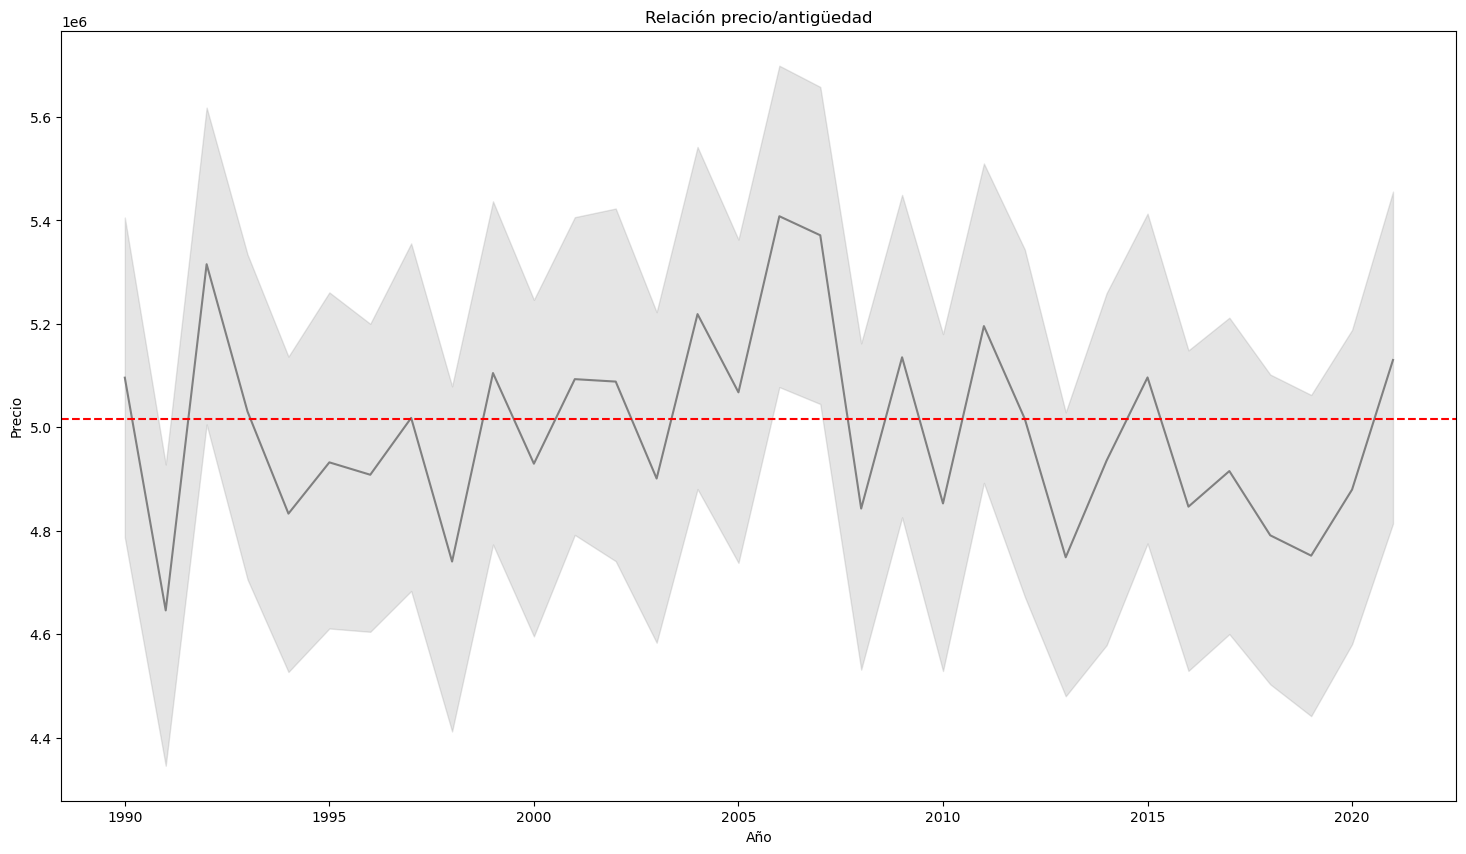

In [14]:
#Relación entre antiguedad y valor de propiedad

valor_maximo=precio.max()
fig, ax = plt.subplots(figsize=(18, 10))
sns.lineplot(data=df_prhouse, x=año, y=precio, color='gray')
ax.axhline(mediana, color='r', linestyle='--', label='Mediana')

plt.xlabel('Año')
plt.ylabel('Precio')
plt.title("Relación precio/antigüedad")

Similar al caso de la exclusividad en los barrios, no parece ser la antiguedad un dato sumamente relevante, menos tomando en cuenta que no hay patrón claro entre periodos de años o entre los minimos y máximos de los precios.

Para finalizar con aquellos datos que en un principo supuse podrían afectar al valor de las propiedades. Procedo a graficar aquellas propiedad que cuenta o no con pileta y patio. 

Text(0.5, 1.0, 'Variación de precio con tener patio o no')

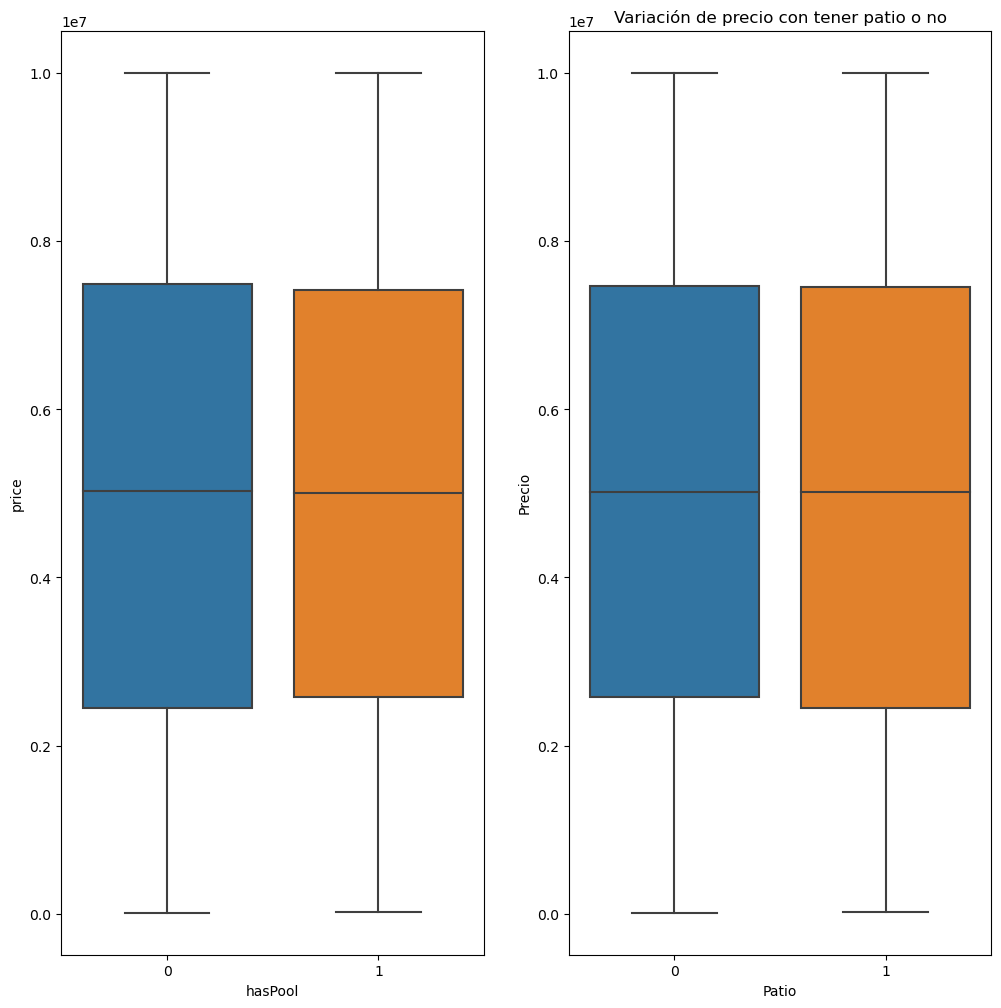

In [15]:
#Gráfico para ver relación entre 
fig, axes = plt.subplots(1, 2, figsize=(12, 12))

sns.boxplot(x=pileta, y=precio, ax=axes[0])
plt.xlabel('Patio')
plt.ylabel('Precio')
plt.title("Variación de precio con tener pileta o no")

sns.boxplot(x=patio, y=precio,ax=axes[1])
plt.xlabel('Patio')
plt.ylabel('Precio')
plt.title("Variación de precio con tener patio o no")

En este caso, no pariese ver una relación directa o tan marcada entre poseer o no una pileta o patio o en la propiedad. La variación del precio es leve y no pareciese determinar directamente su valor. 

Con estos gráficos y análisis realizados pretendí como primer análisis general verificar mis observaciones iniciales acerca de aquellas variables que si podrían afectar el valor de la propiedad. Más adelante me enfocaré en observar mis afirmaciones sobre los valores que, en una primera instancia, no afectarán al precio, e incluso observar el resto de datos que me brinda el dataset, para así de esta manera no sesgar el resultado y reducir lo máximo posible el margen de error.